# Analysis of the infamous Craigslist add section dedicated to missed connections

## I. Introduction

On a daily basis we hear about the incredible advancement in technology and how internet is revolutionizing the way we do things. Internet connects the world, it affects where we eat, how we perceive others and how we want to be perceived. Its safe to say that we are hooked! Hooked on our screens to make majority of the decisions otherwise unimaginable.

Internet has affected our lives in many ways, it has brought on amazing social changes throughout the world and also in our daily lives. One of the most interesting social changes is the way we date and meet our partners. Since the rise of online dating, the stigma associated with it has completely disappeared and has become a common means for seeking partners. In this project I wanted to take a step back and look at one of the oldest sites popularized in the early 2000 for arranging dates. Due to the diversity of postings within the dating subcategory, I decided to focus on the most optimistic in the group. 

## II. Problem Statement

### Why craigslist's missed connection?

- I was really interested in getting a better understanding of the users posting on this section. I wanted to get a better understanding of who the users are and their motivation behind posting on a site where getting a response is very unlikely.

- I also wanted to see if there was any variation between users posting in various cities around the United States.

- Finally I wanted to make a simple recommendation engine that would recommend other users posting on the site based on their sexual orientation and content in their message.


## III. Data Collection

I used the craigslist package available for python to extract all the URLs available for each individual posting at the given time. Using this URL I wrote out a function to scrape the necessary content on a daily basis for a period of ten days. By the end of ten days I had a total of around 8000 postings from 10 US Cities, five from the east coast and five on the west coast.

In [2]:
import pandas as pd
import numpy as np
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import requests
import craigslist
from craigslist import CraigslistPersonals

import seaborn as sns

%matplotlib inline

sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

import textacy

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline

%matplotlib inline
%config InlineBackend.feature_format = 'retina'
sns.set_style("darkgrid")


/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [52]:
cities = ['seattle', 'sfbay', 'honolulu','losangeles', 'sandiego', 'newyork', 'boston', 'miami', 'austin', 'houston']

def extraction(site):
    
    cl = CraigslistPersonals(site = site, category='mis')
    results = cl.get_results(sort_by='newest', geotagged= True)
    
    title = []
    has_image = []
    url = []
    geo_tag = []
    where = []
    ids = []
    datetimes = []
    has_maps = []
    
    for result in results:
        title.append(result['name'])
        has_image.append(result['has_image'])
        url.append(result['url'])
        geo_tag.append(result['geotag'])
        where.append(result['where'])
        ids.append(result['id'])
        datetimes.append(result['datetime'])
        has_maps.append(result['has_map'])
    
    def missed_age(url):
        # initiate request
        response = requests.get(i)
        HTML = response.text
        age = Selector(text=HTML).xpath("//p[@class='attrgroup'][2]/span/b/text()").extract()
        return age
    
    def missed_height(url):
        response = requests.get(i)
        HTML = response.text
        height = Selector(text=HTML).xpath("//span[@class='personals_attrbubble personals_'][2]/b/text()").extract()
        return height
    
    def missed_btype(url):
        response = requests.get(i)
        HTML = response.text
        btype = Selector(text=HTML).xpath("//p[@class='attrgroup'][1]/span[@class='personals_attrbubble personals_'][1]/b/text()").extract()
        return btype
    
    def missed_title(url):
        response = requests.get(i)
        HTML = response.text
        title = Selector(text=HTML).xpath("//span[@class='postingtitletext']/span[@id='titletextonly']/text()").extract()
        return title

    def missed_body(url):
        response = requests.get(i)
        HTML = response.text
        body = Selector(text=HTML).xpath("//section[@id='postingbody']/text()").extract()
        return body

    def missed_who4who(url):
        response = requests.get(i)
        HTML = response.text
        m4m = Selector(text=HTML).xpath("//h2[@class='postingtitle']/span[@class='postingtitletext']/text()").extract()
        return m4m
    
    def missed_id(url):
        response = requests.get(i)
        HTML = response.text
        id = Selector(text=HTML).xpath("//div[@class='postinginfos']/p[@class='postinginfo'][1]/text()").extract()
        return id
    
    # Required Lists
    title = []
    body = []
    m4m = []
    ids = []
    age = []
    height = []
    btype = []
    
    for i in url:

    # Calling the function written before

        a = missed_title(i)
        b = missed_body(i)
        c = missed_who4who(i)
        d = missed_id(i)
        e = missed_age(i)
        f = missed_height(i)
        g = missed_btype(i)
        
    # Appending the extracted lists on to the lists above
        title.append(a)
        body.append(b)
        m4m.append(c)
        ids.append(d)
        age.append(e)
        height.append(f)
        btype.append(g)
      
    clean = body
    
    # Cleaning my body section

    # First using .join to connect at ','
    cleaning = []
    for i in clean:
        i = ','.join(i)
        i = [i]
        cleaning.append(i)
        
    # Cleaning the body of my data
    # removing the unnessary gaps and fillers in the body section

    cleaned_body = []
    for bod in cleaning:
        for bo in bod:
            bo = bo.replace('\n','')
            bo = bo.replace('    ','')
            bo = bo.replace(',', '')
            z = bo
            cleaned_body.append(z)    
            
    clean = m4m  
#   Cleaning Ids    
    cleaning_m4m = []
    for i in clean:
        i = ','.join(i)
        i = [i]
        cleaning_m4m.append(i)
        
    cleaned_m4m = []  
    for bod in cleaning_m4m:
        for bo in bod:
            if bo == '':
                cleaned_body.append(np.nan)
            else:
                bo = bo.replace(' - ', '')
                bo = bo.replace('\n','')
                bo = bo.replace('    ','')
                bo = bo.replace(',', '')
            z = bo
            cleaned_m4m.append(z)
            
    #  Creating a dataframe for finding who the connection is meant for
    df_m4m = pd.DataFrame(cleaned_m4m, columns=["Who_to"])
    
    # cleaning the ids extracted from the scrapping:
    ids_scrapy = []
    
    for i in ids:
        for g in i:
            idd = [int(s) for s in g.split() if s.isdigit()]
            ids_scrapy.append(idd)

    titlef = [val for sublist in title for val in sublist]
    agef = [val for sublist in age for val in sublist]
    btypef = [val for sublist in btype for val in sublist]
    heightf = [val for sublist in height for val in sublist]
    ids_scrapyf = [val for sublist in ids_scrapy for val in sublist]
    
    ## Creating a complete dataframe with all the required info
    df_final = pd.DataFrame([ids_scrapyf, titlef, geo_tag, where, cleaned_m4m, agef, heightf, btypef, cleaned_body, datetimes, has_image, has_maps, url]).T
    df_final.columns = ["Ids", "Title", "Geo_Tag", "Where", "Who_to", "Age", "Height", "Body_type", "Body", "Datetime", "Has_Image", "Has_Maps", "URL"]
    df_final.insert(2, "City", site)
    return df_final

In [53]:
# #Scrapping the data
# cities_first=[]
# for city in cities:
#     cities_first.append(extraction(city))
# all_cities = pd.concat(cities_first, axis=0)
# all_cities = pd.read_csv('../Data/Craigs_2_4')

In [3]:
df = pd.read_csv("../../Craigslist_Project/Data/df_cleaned_06.csv")

In [4]:
df.head(10)

Unnamed: 0           Ids                                 Title    City  \
0           0  5.915963e+09                  Turning love to hate  austin   
1           1  5.963091e+09                               teacher  austin   
2           2  5.962896e+09                     apology to Pierre  austin   
3           3  5.961192e+09                                Millie  austin   
4           4  5.958635e+09    "Hey old man" you said then smiled  austin   
5           5  5.961208e+09                                    MJ  austin   
6           6  5.961250e+09   NYE at Barbarella, you work at Dell  austin   
7           7  5.963361e+09                                   Dan  austin   
8           8  5.961451e+09       Dreamy buff guy outside of Fado  austin   
9           9  5.951413e+09  IT contractor that moved my computer  austin   

                   Geo_Tag                            Where  Who_to   Age  \
0      (30.3423, -97.6673)  In the wind, along with my love  [m, w]   NaN   
1  (30.641818, -97.617309)                        East View  [m, w]  34.0   
2                      NaN                           Austin  [m, m]  59.0   
3                      NaN                              NaN  [m, w]   NaN   
4                      NaN                a basketball game  [m, w]   NaN   
5  (30.255412, -97.762357)                     South Austin  [m, w]   NaN   
6  (30.268352, -97.740276)                      West campus  [w, m]   NaN   
7                      NaN                              NaN  [w, m]  29.0   
8      (30.2896, -97.7396)                           Austin  [m, m]   NaN   
9       (30.3223, -97.739)                              NaN  [w, m]   NaN   

  Height Body_type                        ...                          \
0    NaN       NaN                        ...                           
1    NaN       NaN                        ...                           
2    NaN       NaN                        ...                           
3    NaN       NaN                        ...                           
4    NaN       NaN                        ...                           
5    NaN       NaN                        ...                           
6    NaN       NaN                        ...                           
7    NaN       NaN                        ...                           
8    NaN       NaN                        ...                           
9    NaN       NaN                        ...                           

           Datetime Has_Image Has_Maps  \
0  2016-12-12 08:23     False     True   
1  2017-01-17 09:41     False     True   
2  2017-01-17 07:13     False     True   
3  2017-01-15 23:49     False     True   
4  2017-01-14 01:25     False     True   
5  2017-01-16 00:38     False     True   
6  2017-01-16 02:33     False     True   
7  2017-01-17 12:15     False     True   
8  2017-01-16 08:46     False     True   
9  2017-01-16 09:14     False     True   

                                                URL From To gay  From_binary  \
0  http://austin.craigslist.org/mis/5915962984.html    m  w   0            1   
1  http://austin.craigslist.org/mis/5963091019.html    m  w   0            1   
2  http://austin.craigslist.org/mis/5962895842.html    m  m   1            1   
3  http://austin.craigslist.org/mis/5961191561.html    m  w   0            1   
4  http://austin.craigslist.org/mis/5958635060.html    m  w   0            1   
5  http://austin.craigslist.org/mis/5961207814.html    m  w   0            1   
6  http://austin.craigslist.org/mis/5961249716.html    w  m   0            0   
7  http://austin.craigslist.org/mis/5963361358.html    w  m   0            0   
8  http://austin.craigslist.org/mis/5961450507.html    m  m   1            1   
9  http://austin.craigslist.org/mis/5951412967.html    w  m   0            0   

                                          Body_clean  \
0  imagine the effort it takes to cultivate love ...   
1  you are the ffa teacher for east view i have

## IV. EDA

### Doing a few group by to check out all the basic stats

In [55]:
## Creating a map to show the ten cities I picked

In [56]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

cities = ['Seattle', 'San Francisco ', 'Honolulu ','Los Angeles ', 'San Diego ', 'New York ', 'Boston ', 'Miami ', 'Austin ', 'Houston ']

In [57]:
d= df[df['name'] =='Seattle ']
for i in cities[1:]:
    z = df[df['name'] == i]
    d = d.append(z)

In [58]:
d.drop(2084, axis =0, inplace = True)
d.drop(1300, axis = 0, inplace = True)

In [59]:
name = 'Honolulu'
pop = 991,788
lat = 21.315603
lon = -157.858093

dd = [0, 'Honolulu', 991,788, 21.315603, -157.858093]

In [60]:
dd = {'name': 'Honolulu', 'pop': 991788, 'lat': 21.315603, 'lon': -157.858093}

In [61]:
z = pd.DataFrame(dd, index=[1])

In [62]:
df = d.append(z)

In [63]:
df.reset_index(inplace = True)

In [64]:
df_city_pop =df

In [65]:
import plotly.plotly as py
py.sign_in('rashimk', 'VaUzooTVLhO3fAWIa9cZ')

In [66]:
df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,3000)]
colors = ["rgb(38, 95, 226)","blue"]
cities = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
        title = 'Population of the 10 US Cities<br>',
        showlegend = False,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(232, 55, 55)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~rashimk/0 or inside your plot.ly account where it is named 'd3-bubble-map-populations'


In [67]:
df = pd.read_csv("../../Craigslist_Project/Data/df_cleaned_06.csv")

In [68]:
city_count = df.groupby(['City'])['Ids'].count()

In [69]:
city_count

City
austin        1097
boston         563
honolulu       507
houston       1117
losangeles     635
miami          820
newyork       1046
sandiego       361
seattle        651
sfbay          770
Name: Ids, dtype: int64

In [70]:
city_count = pd.DataFrame(city_count1)

NameError: name 'city_count1' is not defined

In [ ]:
city_count.reset_index(inplace=True)

In [ ]:
city_count["City"] =city_count.City.map(lambda x: x.capitalize())

In [ ]:
city_count

In [ ]:
## Graphing the number 

city = sns.barplot(x = 'City', y = 'Ids', data=city_count)
city.set_title('Total number of posts per city')
for item in city.get_xticklabels():
  item.set_rotation(90)
city.set(ylabel='Total Count')
plt.show()

In [ ]:
city_gender

In [ ]:
df["City"] = df.City.map(lambda x: x.capitalize())

In [ ]:
city_gen = df.groupby(['City','From'])['Ids'].count()

In [71]:
city_gender = pd.DataFrame(city_gen).reset_index()

In [72]:
city_gender['From'] = city_gender['From'].map(lambda x: 'F' if x == 'w' else 'M')

[]

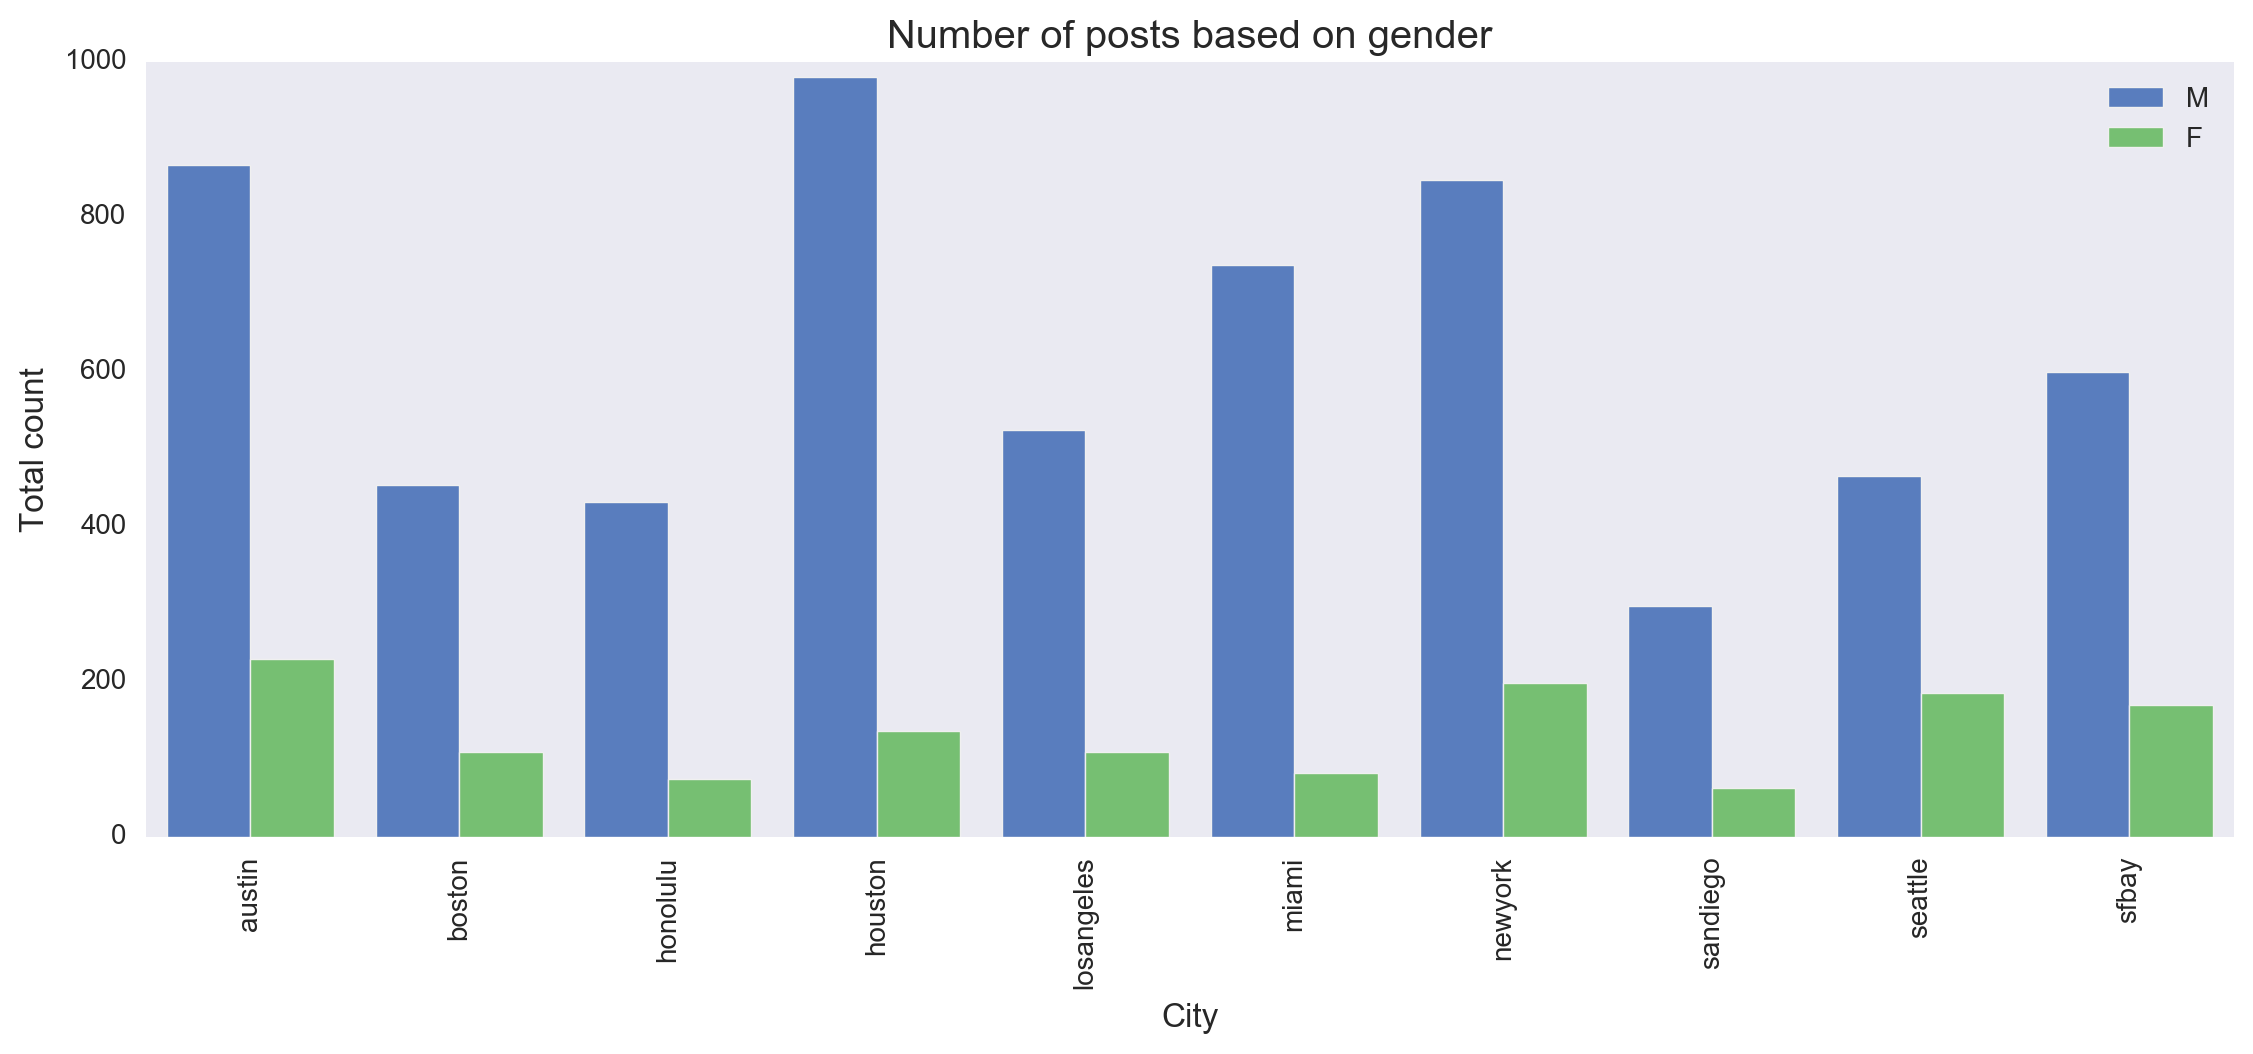

In [87]:

fig, ax = plt.subplots(figsize=(12,5))
# NY_merged_samp.groupby(['day_of_week'])['injuries'].sum().plot(kind='bar')
df_plot = sns.barplot(x='City', y='Ids', data=city_gender, hue='From', palette='muted')
df_plot.set_title('Number of posts based on gender')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.set_ylabel('Total count')
ax.legend(loc='upper right')
fig.set_label("Male and Female ratios")
for item in df_plot.get_xticklabels():
    item.set_rotation(90)


count = [867,230,454,109,432,75,980,137,525,110,738,82,848,198,298,63,465,186,600,170]
z = 1
for i in count:
    a = z - 1
    s = count[z] + count[a]
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format((y/s)*100), (x.mean(), y), 
            ha='center', va='bottom')
plt.plot()

In [74]:
df_attraction = df.groupby(['City','gay'])['Ids'].count()

In [75]:
df_attraction = pd.DataFrame(df_attraction).reset_index()

In [76]:
df_attraction['gay'] = df_attraction['gay'].map(lambda x: 'Gay' if x == 1 else 'Straight')

In [77]:
age = []
for i in df_attraction['Ids']:
    age.append(i)

[]

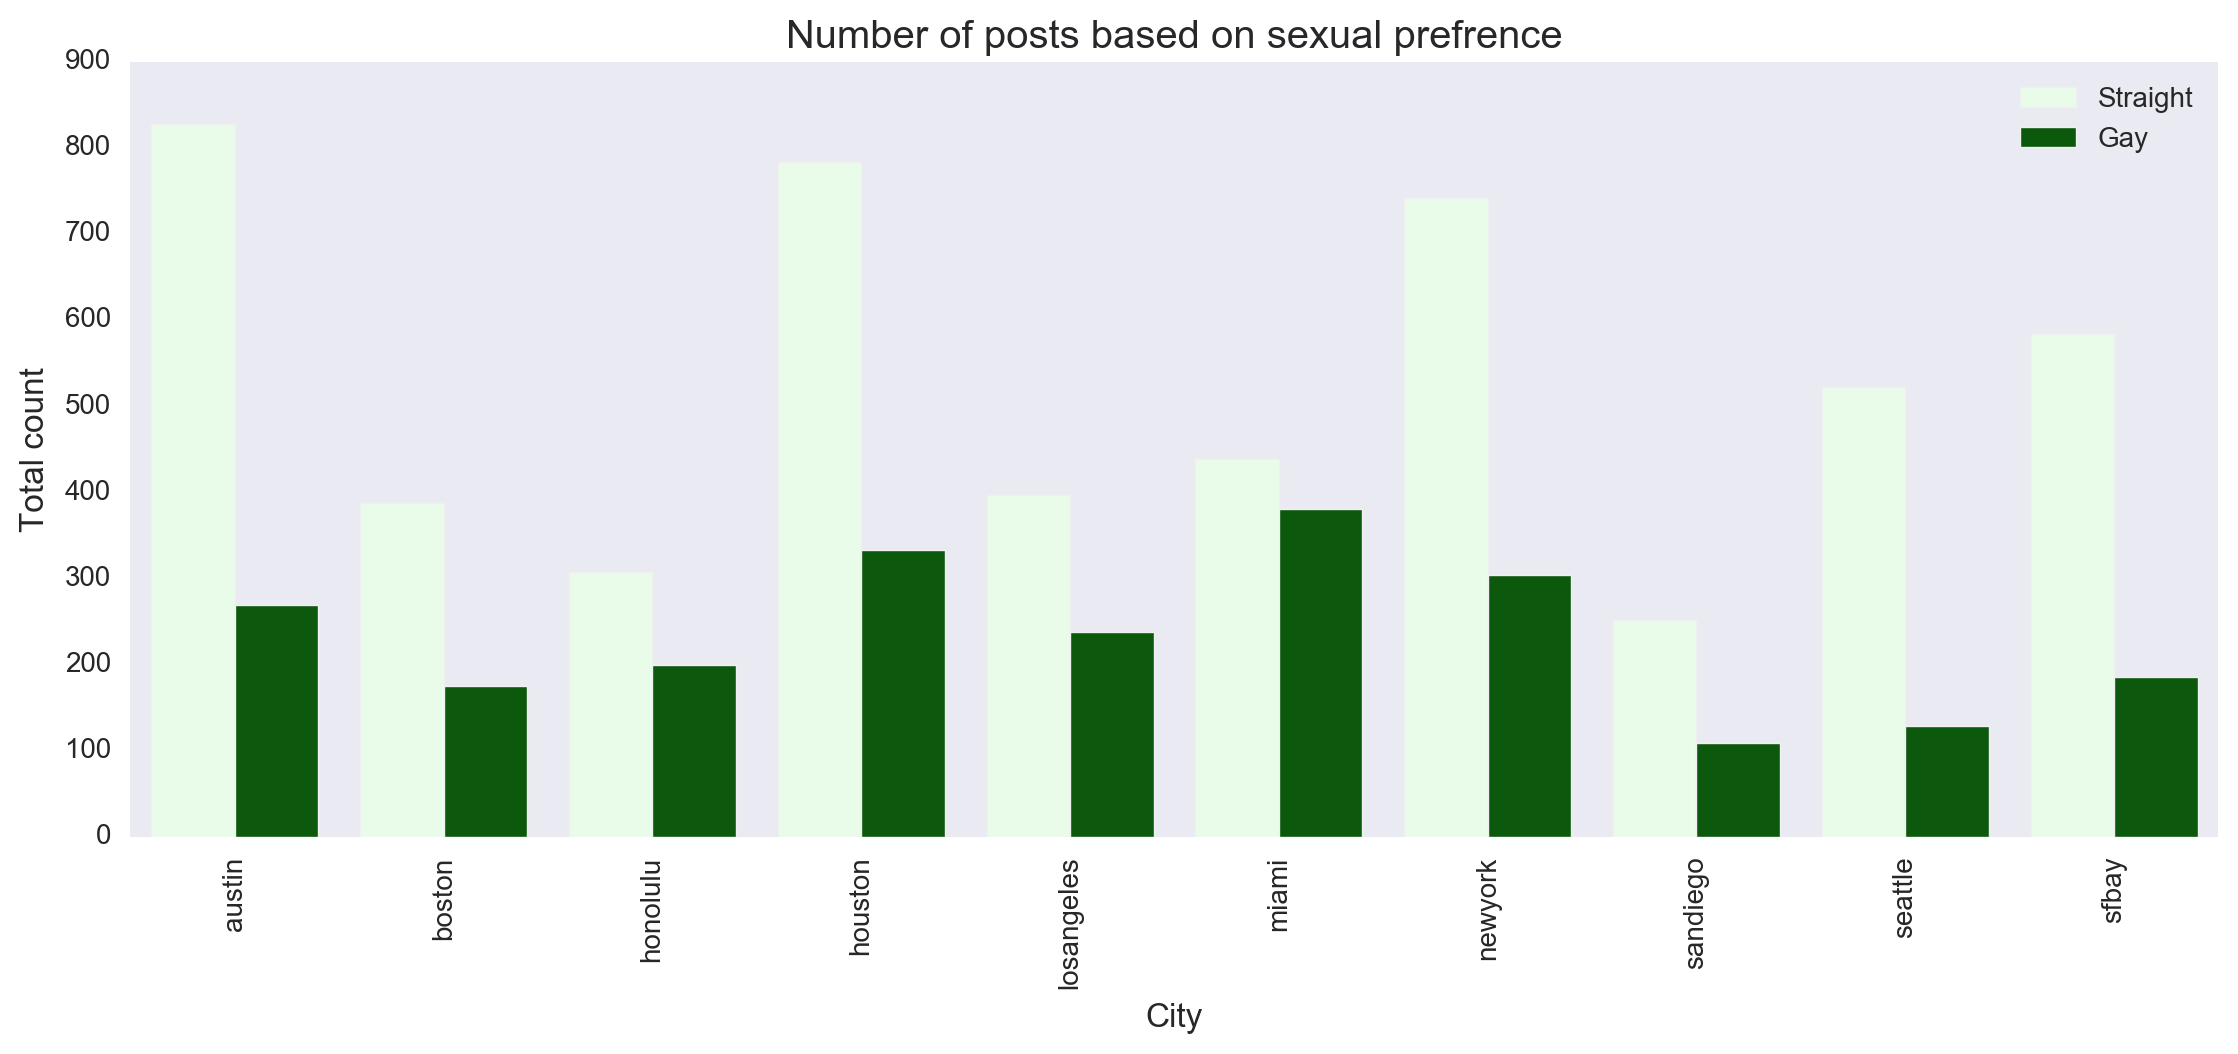

In [86]:
fig, ax = plt.subplots(figsize=(12,5))
# NY_merged_samp.groupby(['day_of_week'])['injuries'].sum().plot(kind='bar')
df_plot = sns.barplot(x='City', y ='Ids', data=df_attraction, hue='gay', color='darkgreen')
df_plot.set_title('Number of posts based on sexual prefrence')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.set_ylabel('Total count')
ax.legend(loc='upper right')
for item in df_plot.get_xticklabels():
    item.set_rotation(90)


plt.plot()

### Exploring based on time posted

In [79]:
df_date = pd.to_datetime(pd.Series(df.Datetime))

In [80]:
df_date = pd.DataFrame(df_date)

In [81]:
# df_date["only_date"] = [d.date() for d in df_date['Datetime']]
df["only_time_hour"] = [d.hour for d in df_date['Datetime']]

In [82]:
z = df.groupby(['only_time_hour','From'])['Ids'].count()

In [83]:
df_time = pd.DataFrame(z).reset_index()

In [84]:
def custom_aggregation_function(x):
    try:
        return x.iloc[3]
    except:
        return 0


df_pivot = pd.pivot_table(df_grouped, values='Ids', columns= 'From', index = 'only_time_hour', fill_value= 0).reset_index()

NameError: name 'df_grouped' is not defined

NameError: name 'df_pivot' is not defined

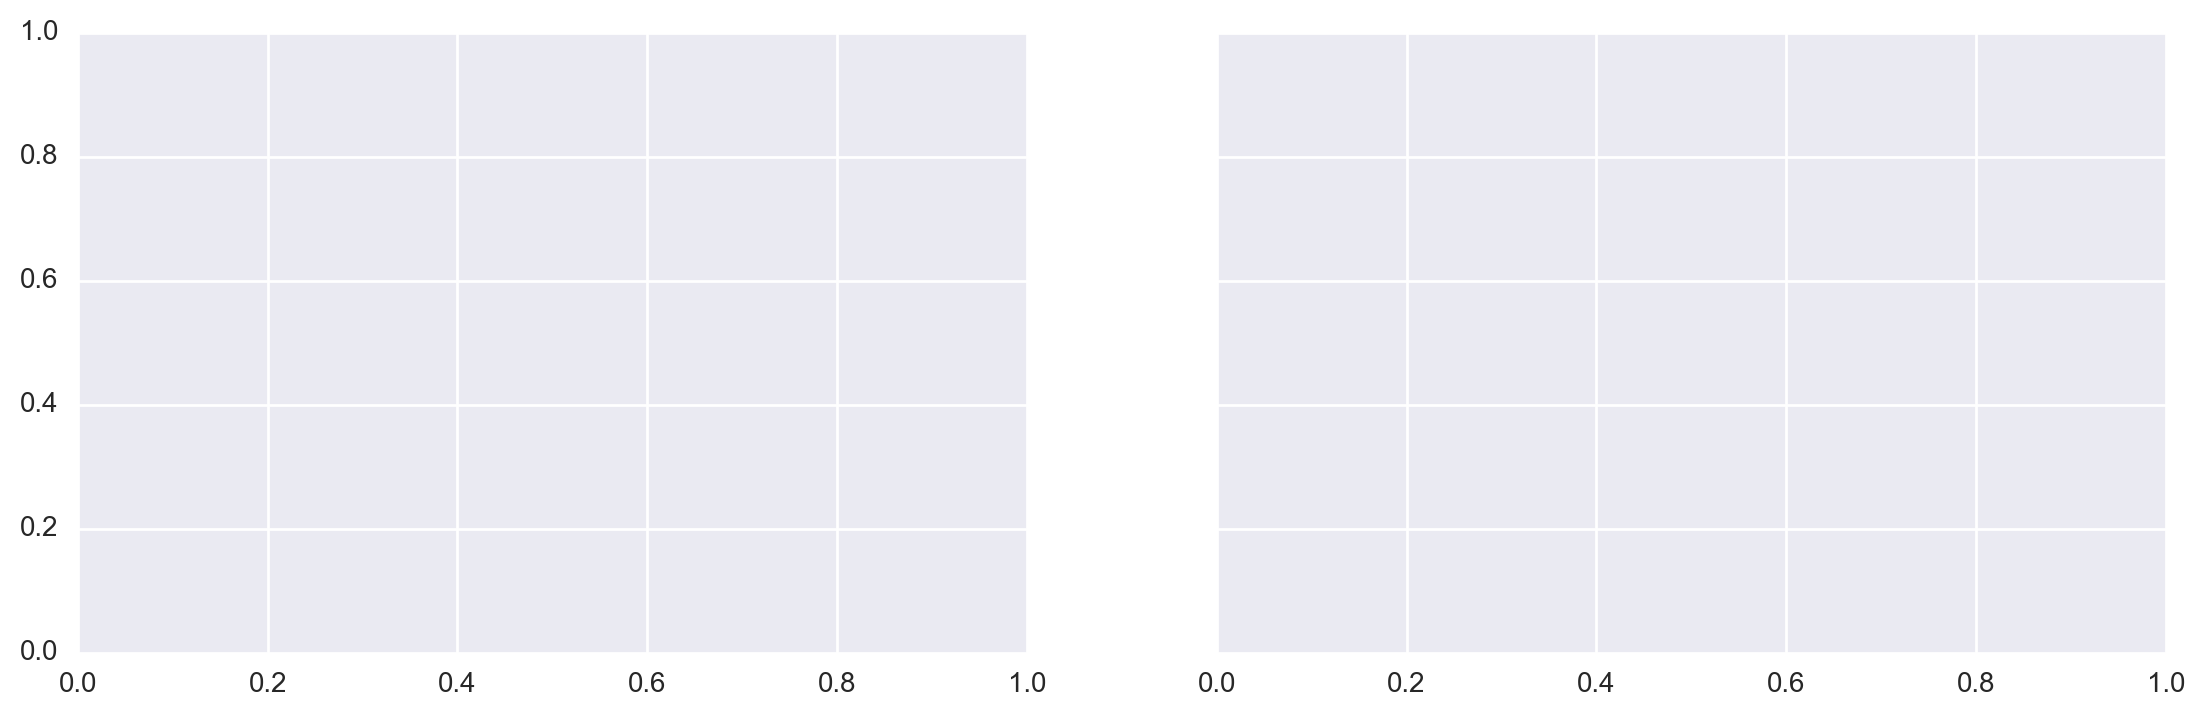

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
sns.barplot(x='only_time_hour', y = 'm',data=df_pivot, color='darkgoldenrod', ax = ax1)
sns.barplot(x='only_time_hour', y = 'w',data=df_pivot, color = 'darkred', ax = ax2)
ax1.set_ylabel('male')
ax2.set_ylabel('female')
ax1.set_xlabel('Time(24 hr)')
ax2.set_xlabel('Time(24 hr)')     
ax1.set_title('Posting time for posts from Male')
ax2.set_title('Posting time for posts from Female')

In [1244]:
df = pd.read_csv('../Data/df_with_matrix.csv')

In [1245]:
df["City"] =df.City.map(lambda x: x.capitalize())

In [1247]:
n_words = df.groupby(['City', 'From'])['n_words'].mean()

In [1248]:
n_words = pd.DataFrame(n_words).reset_index()

In [1249]:
n_words['From'] = n_words['From'].map(lambda x: 'M' if x == 'm' else 'F')

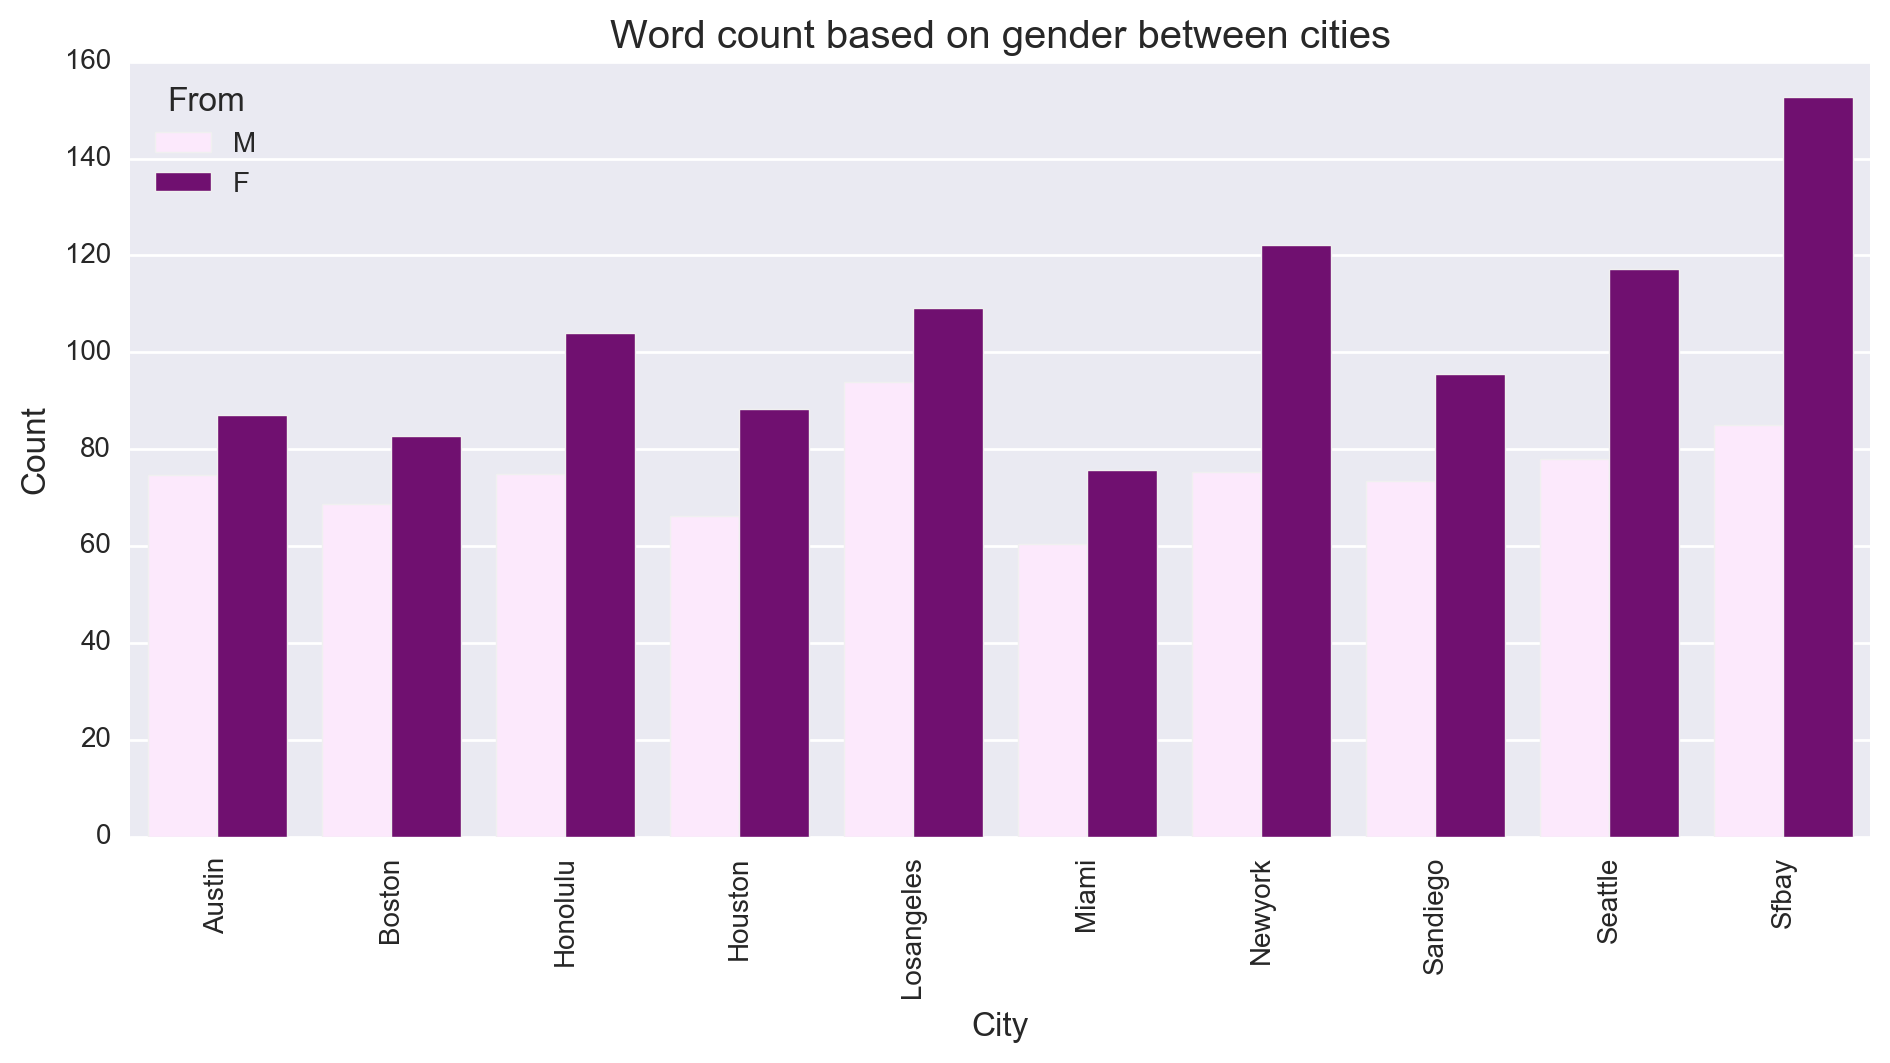

In [1250]:
city = sns.barplot(x='City', y = 'n_words', data=n_words, hue='From', color= 'purple')
city.set_title('Word count based on gender between cities')
for item in city.get_xticklabels():
  item.set_rotation(90)
city.set(ylabel='Count')
plt.show()

In [464]:
df_n_words_2.head(2)

City  gay    n_words
0  Austin    0  80.817365
1  Austin    1  67.304762

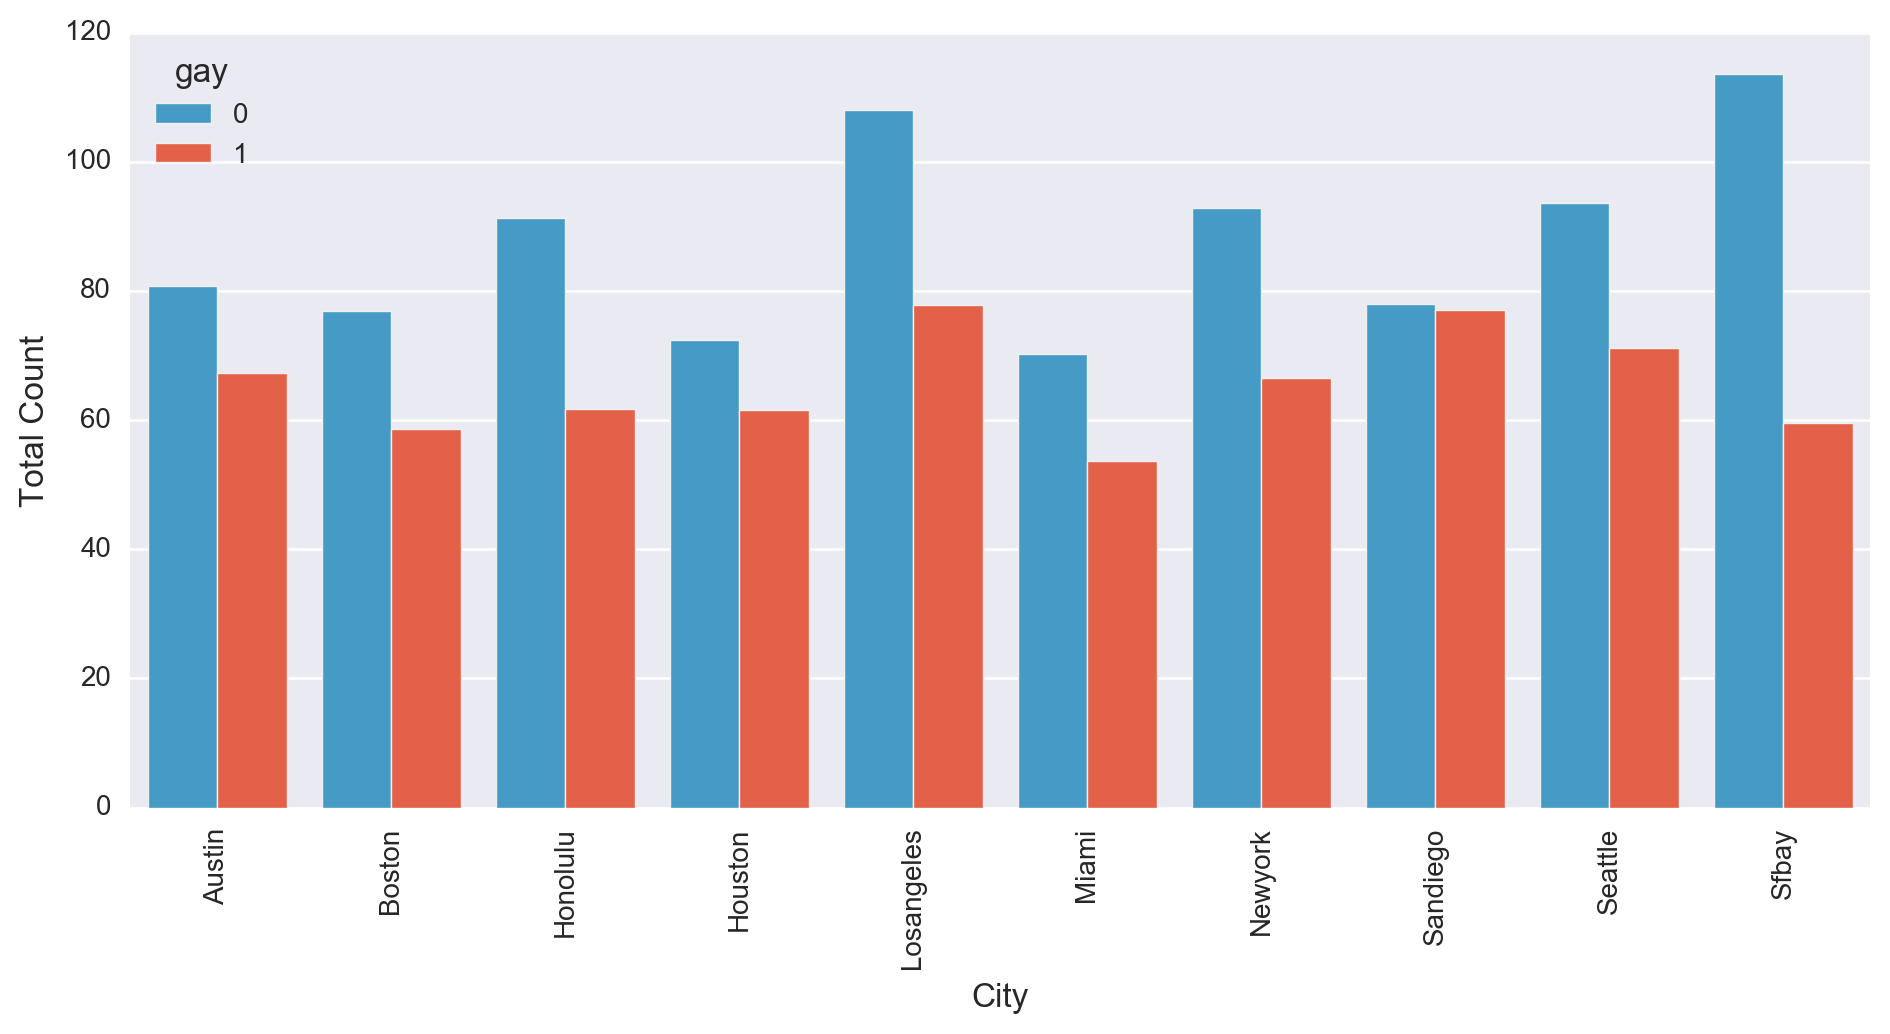

In [467]:
city = sns.barplot(x='City', y = 'n_words', data=df_n_words_2, hue='gay')
for item in city.get_xticklabels():
  item.set_rotation(90)
city.set(ylabel='Total Count')
plt.show()

In [321]:
df = pd.read_csv("../../Craigslist_Project/Data/df_cleaned_06.csv", encoding= 'utf8')

In [322]:
def fun(x):
    doc = textacy.doc.Doc(x, lang=u'en')
    z = textacy.text_stats.readability_stats(doc)
    return z
total = []
flesch_kincaid_grade_level = []
smog_index= []
automated_readability_index = []
n_chars = [] 
n_unique_words = []
n_words = []
n_syllables = []
coleman_liau_index = []
gunning_fog_index = []
flesch_readability_ease = []
n_sents = []
n_polysyllable_words = []

for i in range(df['Body'].shape[0]):
    total.append(fun(df['Body'][i]))

In [341]:
for i in total:
    for key, value in i.iteritems():
        if key == "n_unique_words":
            n_unique_words.append(value)
        if key == "flesch_kincaid_grade_level":
            flesch_kincaid_grade_level.append(value)
        elif key =="smog_index":
            smog_index.append(value)
        elif key == "automated_readability_index":
            automated_readability_index.append(value)
        elif key == "n_chars":
            n_chars.append(value)
        elif key == "n_words":
            n_words.append(value)
        elif key =="n_syllables":
            n_syllables.append(value)
        elif key == "coleman_liau_index":
            coleman_liau_index.append(value)
        elif key =="gunning_fog_index":
            gunning_fog_index.append(value)
        elif key == "flesch_readability_ease":
            flesch_readability_ease.append(value)
        elif key =="n_sents":
            n_sents.append(value)
        elif key == "n_polysyllable_words":
            n_polysyllable_words.append(value)

In [348]:
df_binary['n_polysyllable_words'] = n_polysyllable_words
df_binary["flesch_kincaid_grade_level"] = flesch_kincaid_grade_level
df_binary['smog_index'] = smog_index
df_binary['automated_readability_index'] = automated_readability_index
df_binary['n_chars'] = n_chars
df_binary['n_words'] = n_words
df_binary['n_syllables'] = n_syllables
df_binary['coleman_liau_index'] = coleman_liau_index
df_binary['gunning_fog_index'] = gunning_fog_index
df_binary['flesch_readability_ease'] = flesch_readability_ease
df_binary['n_sents'] = n_sents
df_binary['n_unique_words'] = n_unique_words
df_binary['age'] = df.Age
df_binary['sex'] = df.From_binary

In [349]:
X = df_binary[['flesch_kincaid_grade_level',
'smog_index',
'automated_readability_index',
'n_chars',
'n_unique_words',
'n_words',
'n_syllables',
'coleman_liau_index',
'gunning_fog_index',
'flesch_readability_ease',
'n_sents','n_polysyllable_words']]

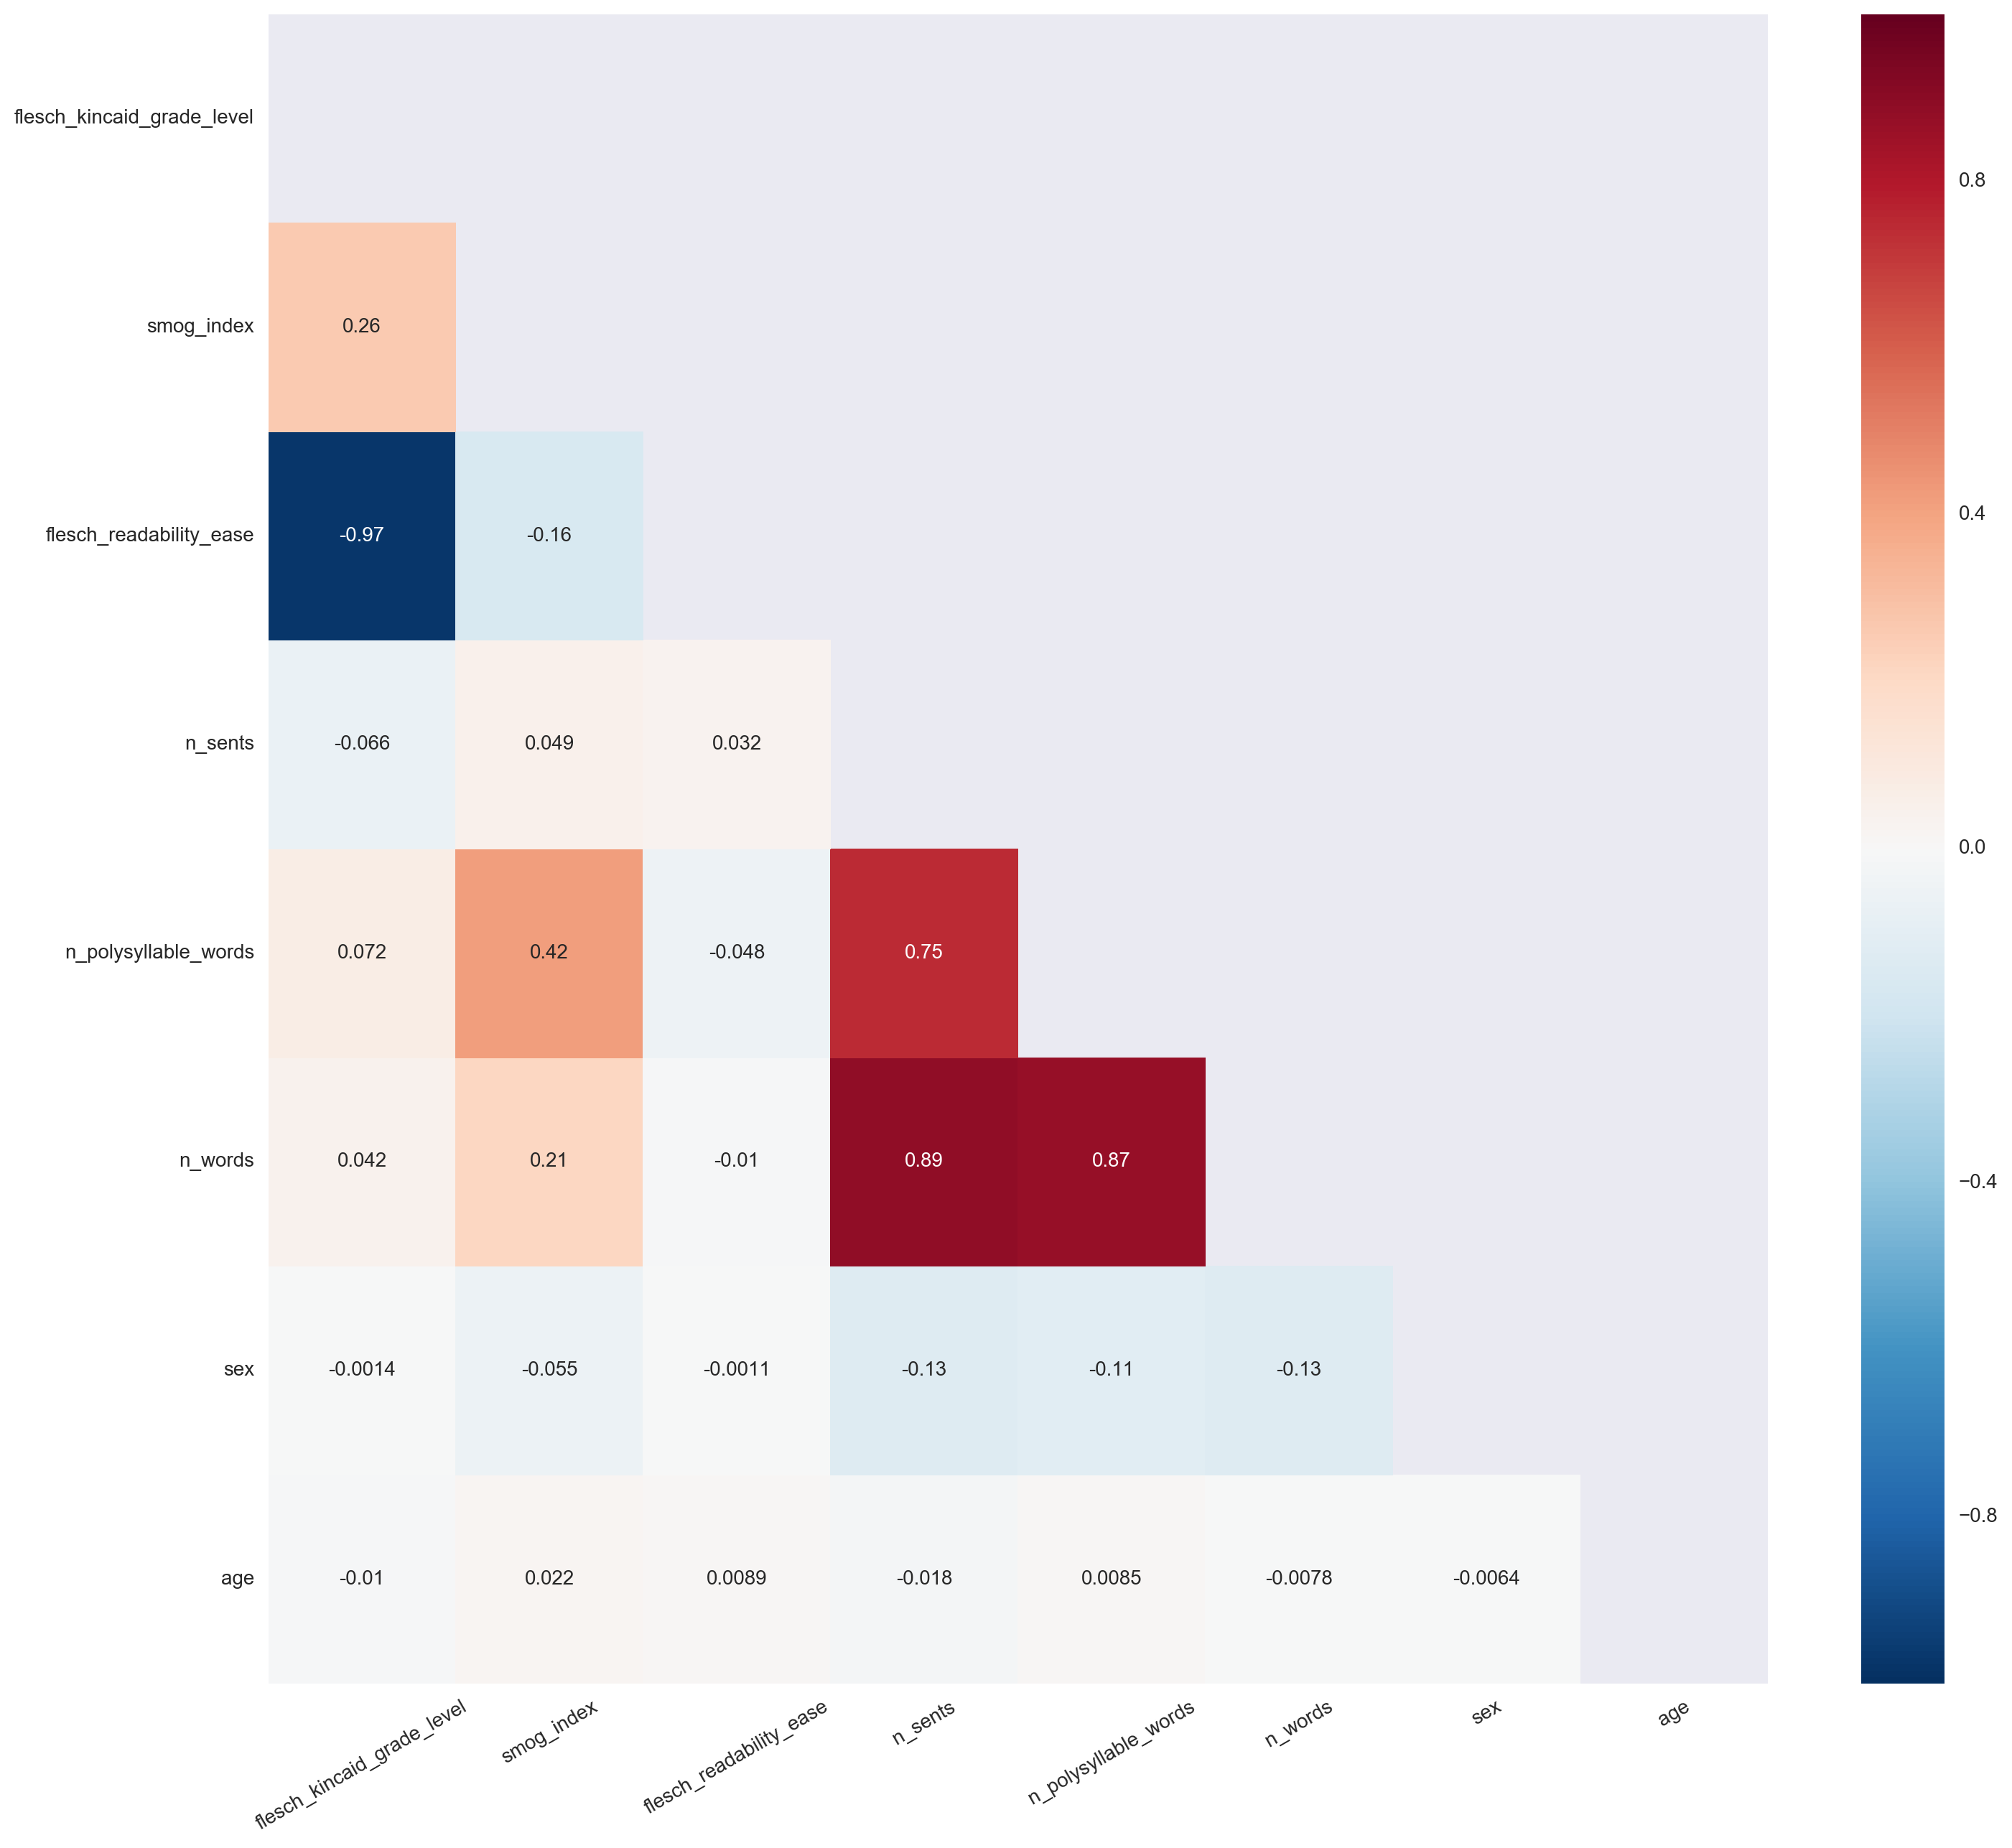

In [361]:
continuous_variable = df_binary[['flesch_kincaid_grade_level',
'smog_index',
'flesch_readability_ease',
'n_sents','n_polysyllable_words', 'n_words', 'sex', 'age']]

def correlation_heat_map(df):
    corrs = continuous_variable.corr()
    plt.rcParams['figure.figsize']=(15,15)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=True)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)
    plt.show()

correlation_heat_map(continuous_variable)

## Common Phrases

In [874]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('know')
stop.append('like')
stop.append('im')
stop.append('would')
stop.append('say')
stop.append('saw')
stop.append('ill')
stop.append('one')
stop.append('dont')
stop.append('tell')
stop.append('got')
stop.append('one')
stop.append('looked')
stop.append('hi')
stop.append('let')
stop.append('next')
stop.append('told')
stop.append('see')
stop.append('said')
stop.append('go')

In [920]:
df_grouped_m = df[df['gay'] == 1]

In [921]:
## From the data extracting the tfidf and count vectorizer
count_vect = CountVectorizer(max_df = 0.7, min_df = 0.01, max_features=1000, stop_words= stop, ngram_range=(1,1))

In [922]:
X_all_m = count_vect.fit_transform(df_grouped_m.Body_clean)

In [923]:
x_df_m     =  pd.DataFrame(X_all_m.toarray(), columns=count_vect.get_feature_names())
cv_df_m_1    =  pd.DataFrame(x_df_m.sum(), columns=["freq"])
cv_df_m_1 = cv_df_m_1.sort_values("freq", ascending=False).head(100).T

In [924]:
words_m = cv_df_m_1.columns
words_m = words_m.values
words_m = words_m.tolist()

In [925]:
words_m

[u'number',
 u'guy',
 u'get',
 u'looking',
 u'love',
 u'back',
 u'time',
 u'around',
 u'want',
 u'youre',
 u'think',
 u'hot',
 u'meet',
 u'wearing',
 u'black',
 u'hope',
 u'today',
 u'contact',
 u'hit',
 u'met',
 u'times',
 u'cock',
 u'really',
 u'numbernumber',
 u'something',
 u'interested',
 u'long',
 u'made',
 u'nice',
 u'work',
 u'name',
 u'sure',
 u'good',
 u'came',
 u'id',
 u'man',
 u'handsome',
 u'could',
 u'maybe',
 u'wanted',
 u'eye',
 u'night',
 u'room',
 u'left',
 u'make',
 u'didnt',
 u'car',
 u'white',
 u'please',
 u'guys',
 u'hair',
 u'last',
 u'shirt',
 u'eyes',
 u'great',
 u'us',
 u'way',
 u'lets',
 u'never',
 u'shot',
 u'together',
 u'ass',
 u'thought',
 u'play',
 u'cute',
 u'fun',
 u'color',
 u'even',
 u'take',
 u'went',
 u'morning',
 u'couple',
 u'talk',
 u'give',
 u'lot',
 u'years',
 u'also',
 u'hey',
 u'older',
 u'ago',
 u'dick',
 u'look',
 u'friend',
 u'asked',
 u'first',
 u'kept',
 u'body',
 u'big',
 u'little',
 u'another',
 u'remember',
 u'going',
 u'sexy',
 u'st

In [926]:
## From the data extracting the tfidf and count vectorizer
count_vect = CountVectorizer(max_df = 0.7, min_df = 0.01, max_features=1000, stop_words= stop, ngram_range=(2,2))

In [927]:
X_all = count_vect.fit_transform(df_grouped_m.Body_clean)

In [928]:
x_df     =  pd.DataFrame(X_all.toarray(), columns=count_vect.get_feature_names())
cv_df_m_2    =  pd.DataFrame(x_df.sum(), columns=["freq"])
cv_df_m_2 = cv_df_m_2.sort_values("freq", ascending=False).head(100).T

In [929]:
words_m_2 = cv_df_m_2.columns
words_m_2 = words_m_2.values
words_m_2 = words_m_2.tolist()

In [885]:
## For women

In [886]:
df_grouped_w = df[df['From'] == 'w']

In [887]:
## From the data extracting the tfidf and count vectorizer
count_vect = CountVectorizer(max_df = 0.7, min_df = 0.01, max_features=1000, stop_words= stop, ngram_range=(1,1))

In [888]:
X_all = count_vect.fit_transform(df_grouped_w.Body_clean)

In [889]:
x_df     =  pd.DataFrame(X_all.toarray(), columns=count_vect.get_feature_names())
cv_df_m_1    =  pd.DataFrame(x_df.sum(), columns=["freq"])
cv_df_m_1 = cv_df_m_1.sort_values("freq", ascending=False).head(100).T

In [890]:
words_w = cv_df_m_1.columns
words_w = words_w.values
words_w = words_w.tolist()

In [891]:
## From the data extracting the tfidf and count vectorizer
count_vect = CountVectorizer(max_df = 0.7, min_df = 0.01, max_features=1000, stop_words= stop, ngram_range=(2,2))

In [892]:
X_all = count_vect.fit_transform(df.Body_clean)

In [893]:
x_df     =  pd.DataFrame(X_all.toarray(), columns=count_vect.get_feature_names())
cv_df_m_2    =  pd.DataFrame(x_df.sum(), columns=["freq"])
cv_df_m_2 = cv_df_m_2.sort_values("freq", ascending=False).head(100).T

In [894]:
words_w_2 = cv_df_m_2.columns
words_w_2 = words_w_2.values
words_w_2 = words_w_2.tolist()

### Making a word cloud for the most frequent words excluding the stopwords

In [ ]:
with open("cv_m.text", "w") as fp:
    text_content = " ".join(['"%s" ' % word for word in words_m_1])
    fp.write(text_content)

In [930]:
## Codes from Dave to compare top phrases from men
with open("cv_mm.text", "w") as fp:
    text_content = " ".join(words_m)
    fp.write(text_content)
    
## Codes from Dave to compare top phrases from women
# with open("cv_w.text", "w") as fp:
#     text_content = " ".join(words_w)
#     fp.write(text_content)

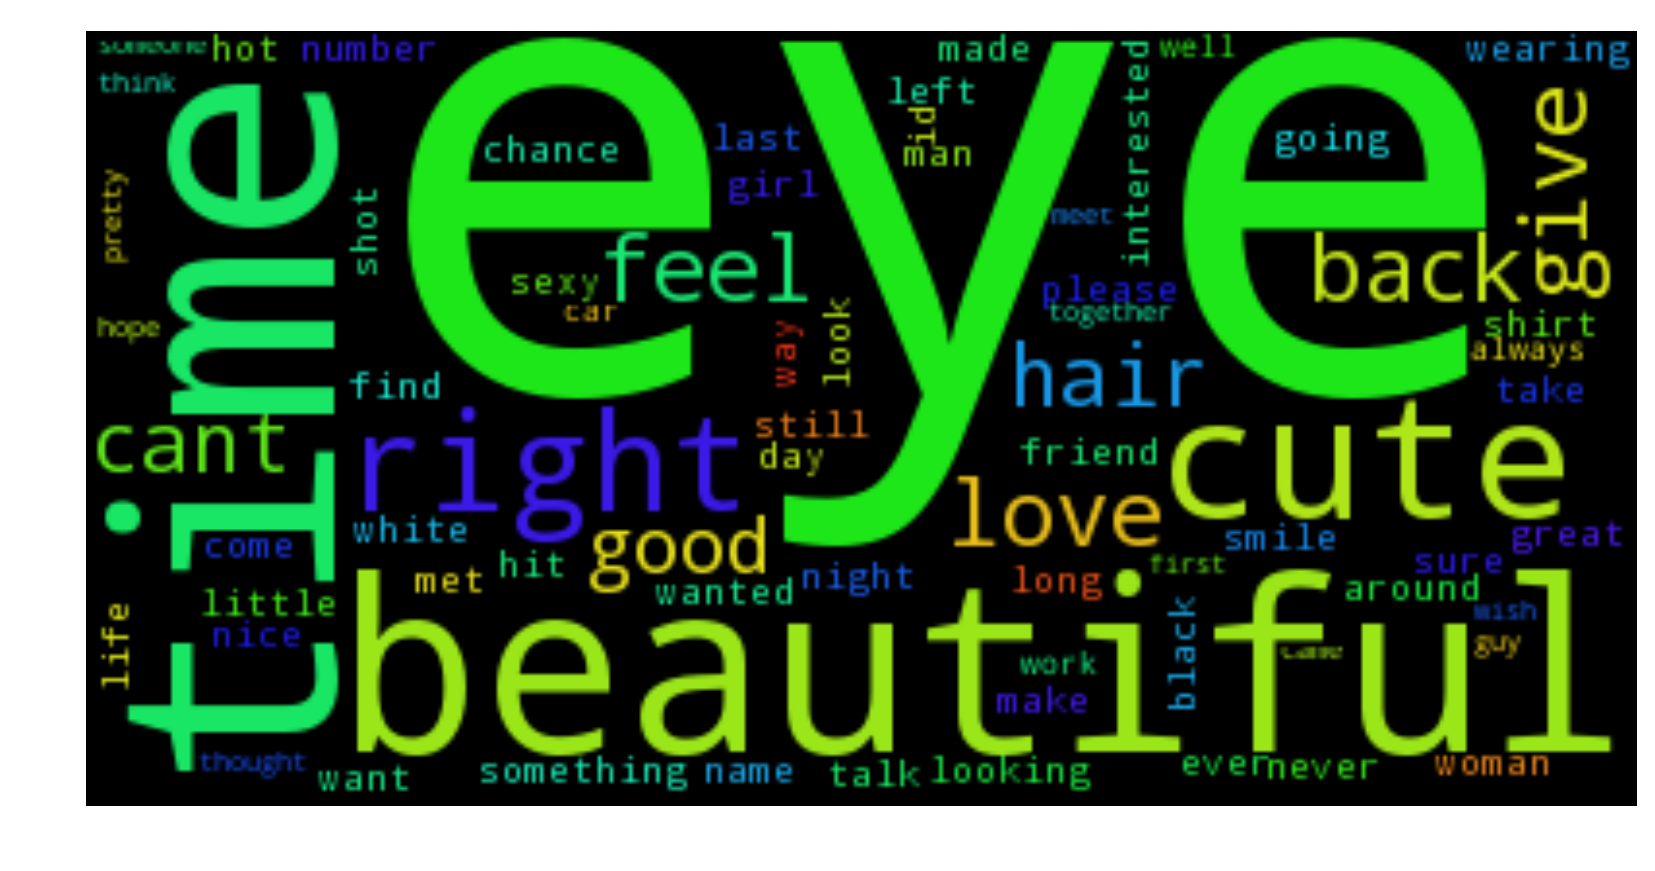

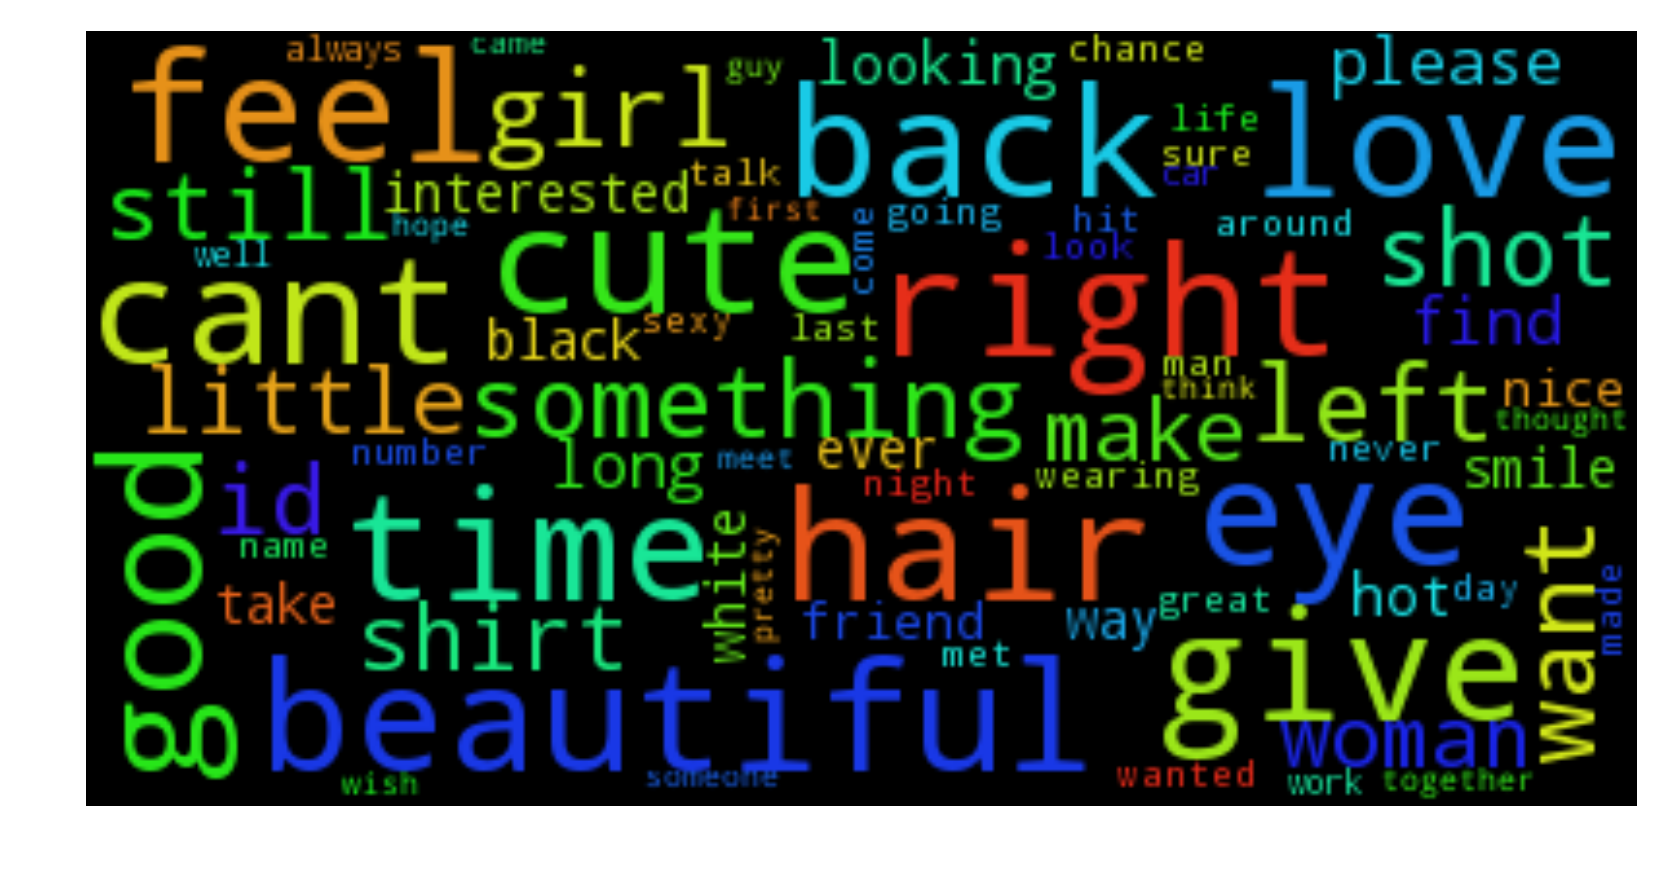

In [905]:

from os import path
from wordcloud import WordCloud

d = path.dirname('../Data/')

# Read the whole text.
text = open(path.join(d, '../Data/cv_m.text')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

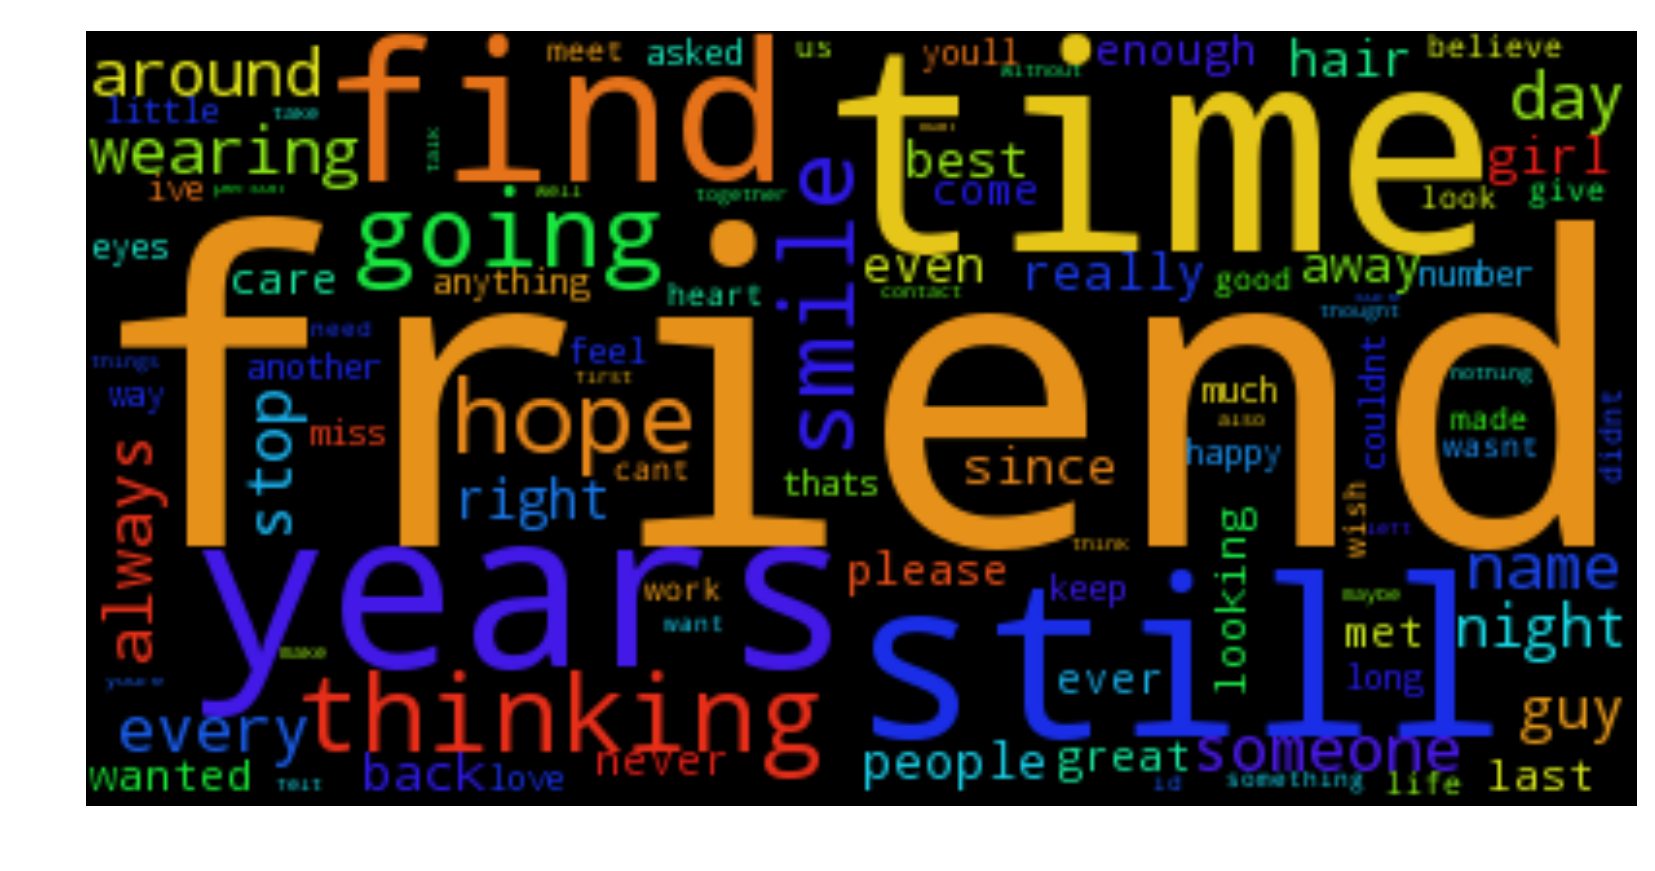

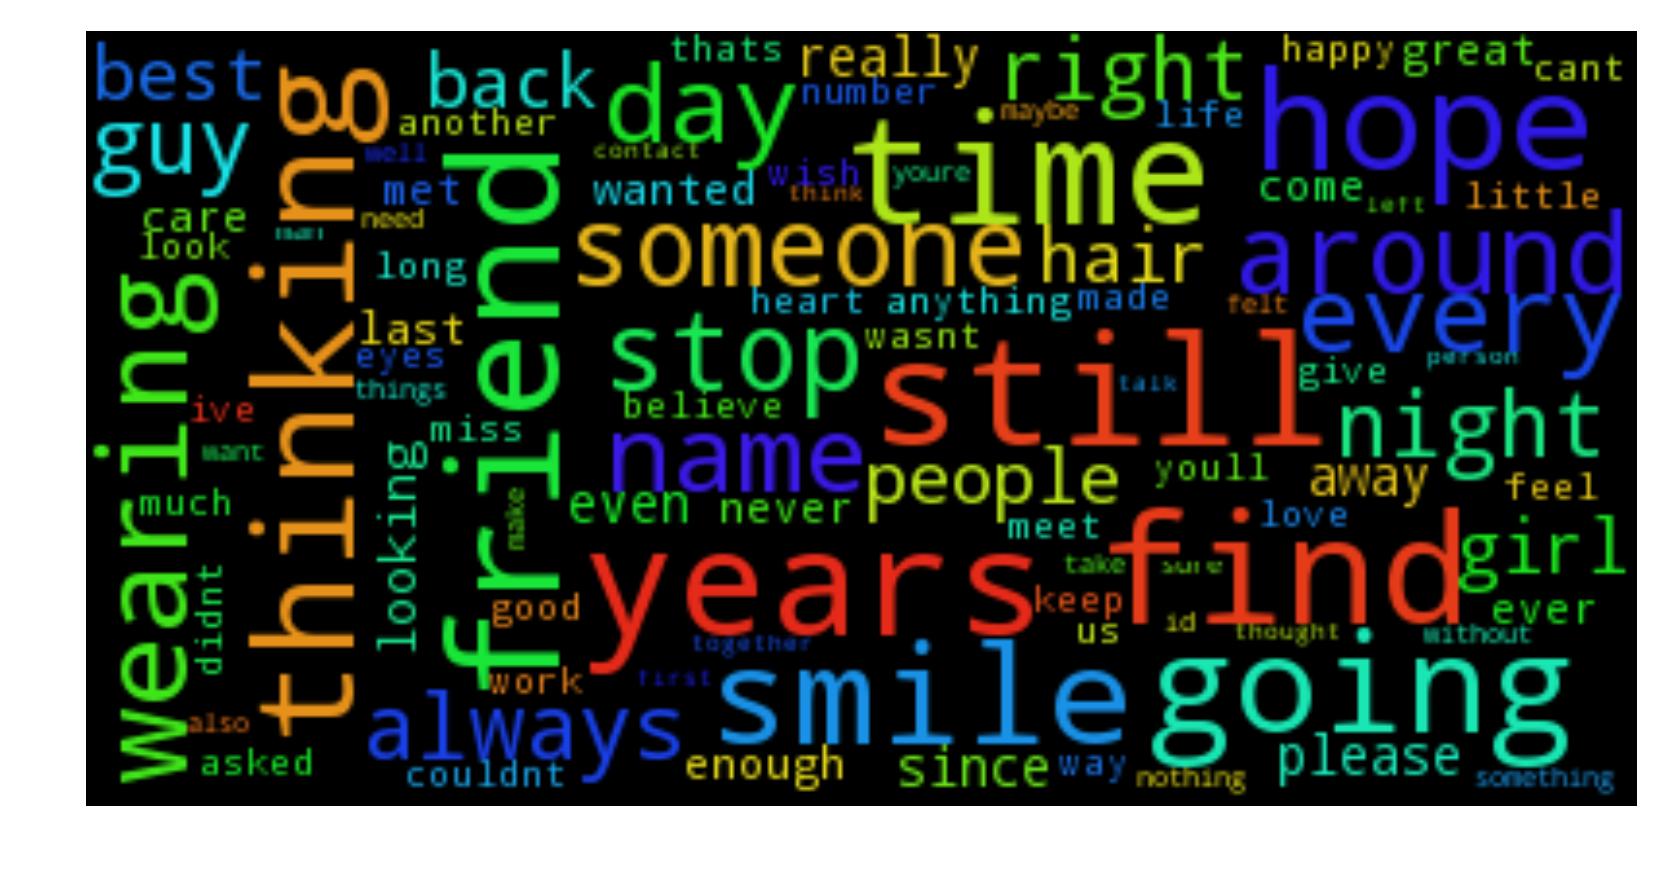

In [907]:

from os import path
from wordcloud import WordCloud

d = path.dirname('../Data/')

# Read the whole text.
text = open(path.join(d, 'cv_w.text')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

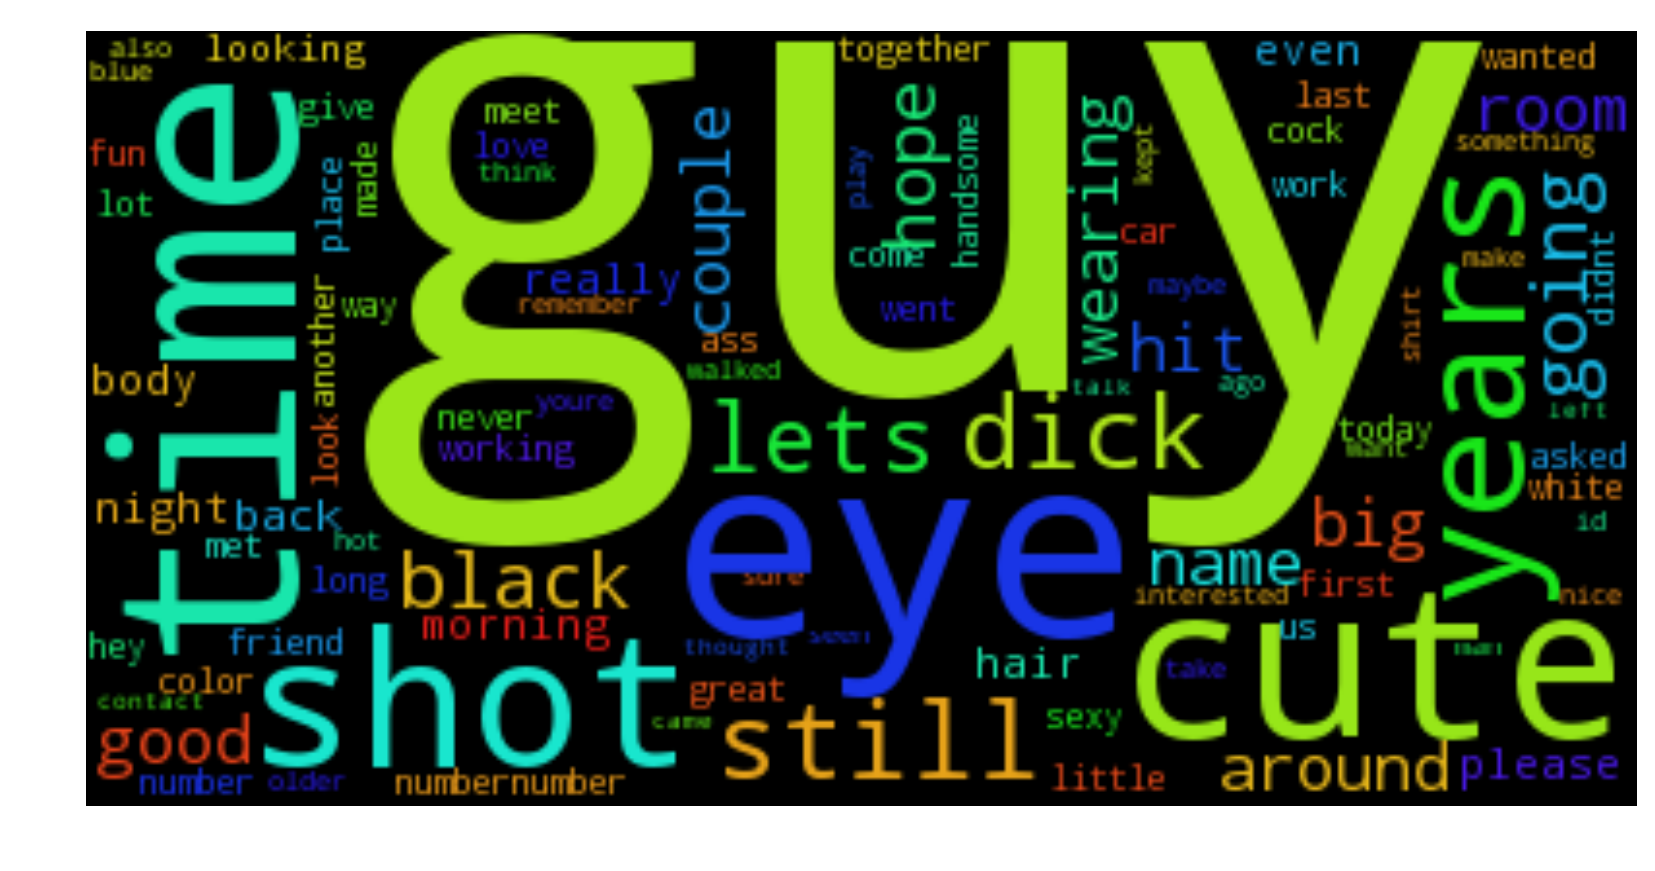

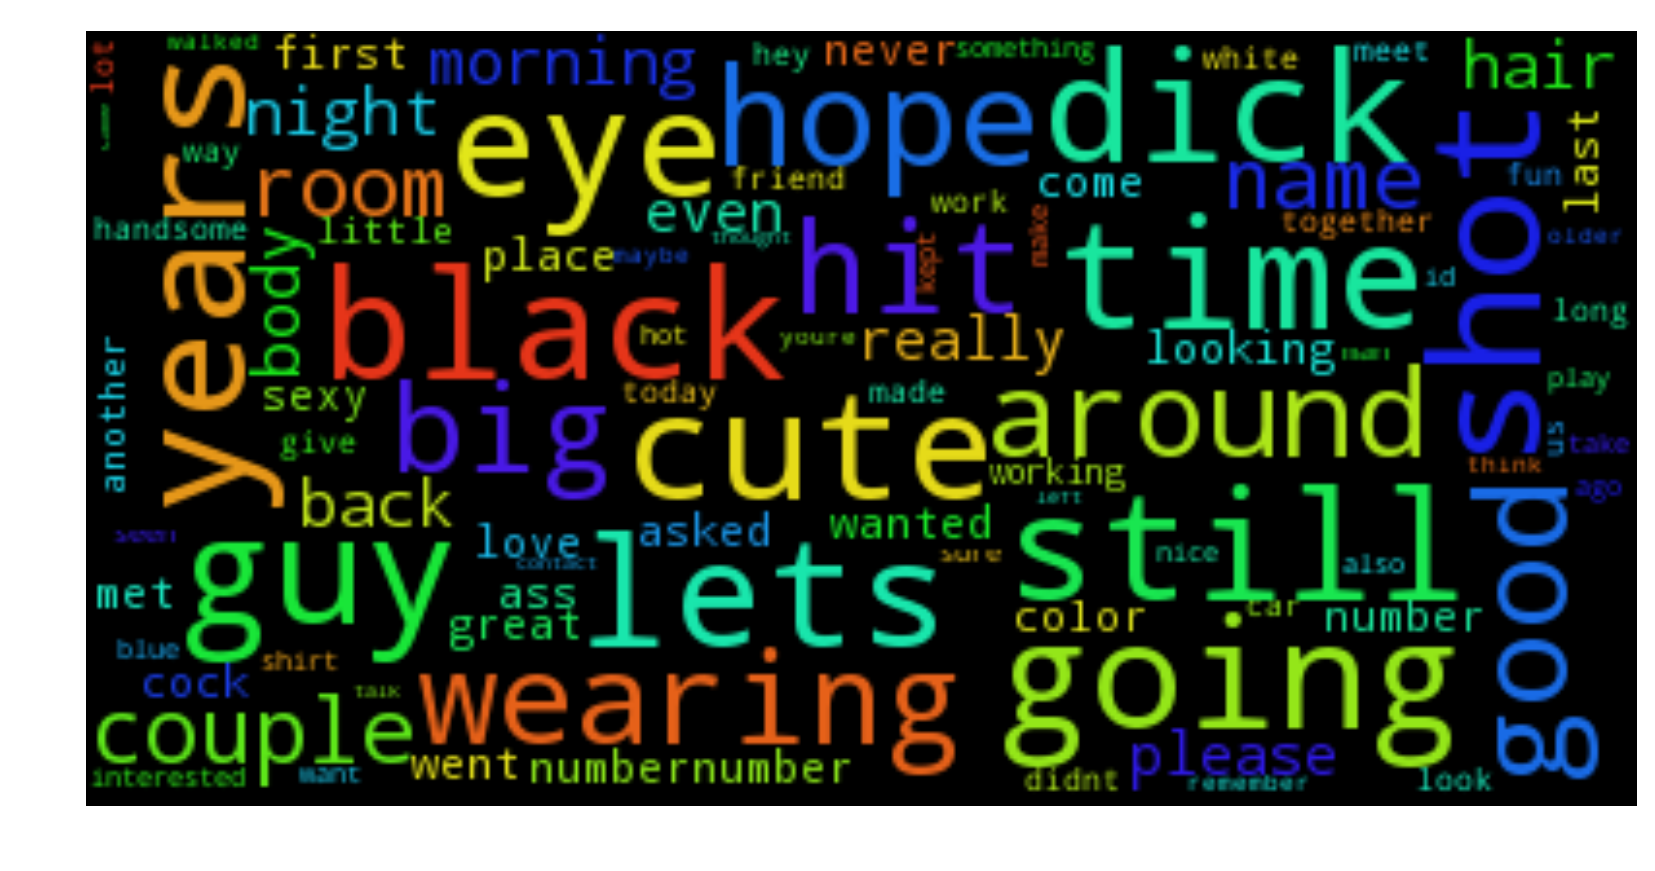

In [936]:

from os import path
from wordcloud import WordCloud

d = path.dirname('../Data/')

# Read the whole text.
text = open(path.join(d, 'cv_mm.text')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()